In [1]:
#Importing Important Libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
#Function for calculating sigmoid of a number
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [3]:
#Function for predicting the class using weights
def predict(row,weights):   
    activation = weights[0]
    for i in range(len(row)):
        activation += weights[i+1]*row[i]
    if sigmoid(activation) >= 0.5:
        return 0.9
    else:
        return 0.1

In [4]:
#Function for calculating error rate of prediction
def error_rate(predicted_classes, correct_set):
    count = 0;
    for i in range(len(predicted_classes)):
        if (abs(predicted_classes[i] != correct_set[i][-1])):
            count +=1
    return count/len(correct_set) * 100

In [5]:
#Function which trains the weights for the ANN
def ANN(train):
    iterations = 1000
    Weights = []
    for i in range(len(train[0])):
        Weights.append(0.0)
    alpha = 0.01
    for t in range(iterations):
        count = 0
        for row in train:
            Od = predict(row[:-1],Weights)
            error = row[-1] - Od
            if (error == 0):
                count += 1
            Weights[0] += alpha*error
            for i in range(len(row)-1):
                Weights[i+1] += alpha*error*row[i]
        if (count == len(train)):
            break
    if (count == len(train)):
        print("Training completed in",t,"iterations.")
    else:
        print("Iterations Completed")
    return Weights

In [6]:
#Function for predicting a number of rows using weights
def Predict_test(test,weights):
    predicted = []
    for test_row in test:
        predicted.append(predict(test_row[:-1],weights))
    return predicted

In [7]:
#Function for applying leave-one-out mechanism
def Leave1out(data):
    for i in range(len(data)):
        test = data[i]
        train = data[:i] + data[i+1:]
        weights = ANN(train)
        print("For point -", test[:-1])
        print("Actual -", test[-1])
        print("Prediction - ", predict(test[:-1],weights))

In [8]:
#Function for calculating the X and Y values to build the line of the ANN
def Line(dataset,weights):
    X = []
    Y = [] 
    slope = -1 * weights[1]/weights[2]
    c = -1 * weights[0]/weights[2]
    for row in dataset:
        X.append(row[1])
        Y.append(slope*row[1] + c)
    return X,Y

In [9]:
#Dataset of the question
data = [[15, 10, 0.9], [13, 6, 0.9], [14,8, 0.9], [12, 9, 0.9], [10, 7, 0.9], [12, 6, 0.9], [11, 8, 0.9], [13, 10, 0.9],[10, 6, 0.9],
        [8, 12, 0.1], [6, 11, 0.1], [8, 14, 0.1], [9, 14, 0.1], [10, 15, 0.1], [9, 12, 0.1], [7, 10, 0.1], [8, 13, 0.1]]


#Training the ANN with all data points
weights = ANN(data)

print("Final weights -", weights)
print("Training accuracy =", (1 - error_rate(Predict_test(data,weights), data) )* 100, "%")

Training completed in 5 iterations.
Final weights - [-0.008, 0.13599999999999998, -0.168]
Training accuracy = 100.0 %


In [10]:
#Application of leave-one-out mechanism
Leave1out(data) 

Training completed in 2 iterations.
For point - [15, 10]
Actual - 0.9
Prediction -  0.9
Training completed in 5 iterations.
For point - [13, 6]
Actual - 0.9
Prediction -  0.9
Training completed in 5 iterations.
For point - [14, 8]
Actual - 0.9
Prediction -  0.9
Training completed in 8 iterations.
For point - [12, 9]
Actual - 0.9
Prediction -  0.9
Training completed in 5 iterations.
For point - [10, 7]
Actual - 0.9
Prediction -  0.9
Training completed in 5 iterations.
For point - [12, 6]
Actual - 0.9
Prediction -  0.9
Training completed in 5 iterations.
For point - [11, 8]
Actual - 0.9
Prediction -  0.9
Training completed in 5 iterations.
For point - [13, 10]
Actual - 0.9
Prediction -  0.9
Training completed in 5 iterations.
For point - [10, 6]
Actual - 0.9
Prediction -  0.9
Training completed in 3 iterations.
For point - [8, 12]
Actual - 0.1
Prediction -  0.1
Training completed in 5 iterations.
For point - [6, 11]
Actual - 0.1
Prediction -  0.1
Training completed in 5 iterations.
For p

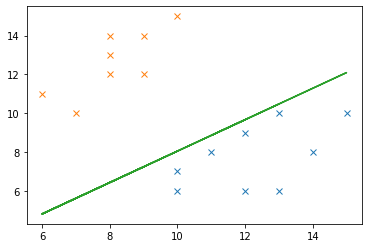

In [11]:
#Graphically representing the Classes and the perceptron after training with the training dataset
x1 = []
x2 = []
y1 = []
y2 = []
X_line, Y_line = Line(data, weights)
 
for row in data:
    if row[-1] == 0.9:
        x1.append(row[0])
        y1.append(row[1])
    else:
        x2.append(row[0])
        y2.append(row[1])

plt.plot(x1,y1,"x")
plt.plot(x2,y2,"x")
plt.plot(X_line, Y_line)
plt.show()